In [1]:
from prometheus_api_client import PrometheusConnect, MetricRangeDataFrame
from prometheus_api_client.utils import parse_datetime
import pandas as pd
import pendulum

prom = PrometheusConnect(url="http://h-0:8428")

metric_names = prom.all_metrics()
# print(metric_names)
deployments = prom.get_label_values("deployment_start_ts")
deployments = sorted(
    list(map(lambda x: (pendulum.parse(x, strict=False), x), deployments)), reverse=True
)
for i, v in enumerate(deployments):
    print(i, v)
# prom.get_label_values("deployment_ts")
# pendulum.now().to_rfc2822_string()


0 (DateTime(2023, 3, 30, 14, 3, 48, 349135, tzinfo=Timezone('+02:00')), '2023-03-30T14:03:48.349135+02:00')
1 (DateTime(2023, 3, 30, 13, 47, 10, 719832, tzinfo=Timezone('+02:00')), '2023-03-30T13:47:10.719832+02:00')
2 (DateTime(2023, 3, 30, 13, 21, 42, 884839, tzinfo=Timezone('+02:00')), '2023-03-30T13:21:42.884839+02:00')
3 (DateTime(2023, 3, 30, 12, 54, 16, 471750, tzinfo=Timezone('+02:00')), '2023-03-30T12:54:16.471750+02:00')
4 (DateTime(2023, 3, 30, 12, 33, 46, 679476, tzinfo=Timezone('+02:00')), '2023-03-30T12:33:46.679476+02:00')
5 (DateTime(2023, 3, 30, 11, 58, 2, 115055, tzinfo=Timezone('+02:00')), '2023-03-30T11:58:02.115055+02:00')
6 (DateTime(2023, 3, 30, 11, 36, 51, 992509, tzinfo=Timezone('+02:00')), '2023-03-30T11:36:51.992509+02:00')


In [12]:
index = 0
job_id = 1362332
chosen_ts = deployments[index][1]
chosen_dt = deployments[index][0]
# start_time = parse_datetime("2d")
# print(start_time)
label_config = {
    "deployment_start_ts": chosen_ts
}
# df = MetricRangeDataFrame(prom.custom_query_range(
#     f'scaph_process_power_consumption_microwatts{{deployment_start_ts="{chosen_ts}", instance="nova-10.lyon.grid5000.fr"}}',  # this is the metric name and label config
#     start_time=deployments[index][0],
#     end_time=chosen_dt.add(minutes=10),
#     step=5
# ))
df = MetricRangeDataFrame(prom.get_metric_range_data(
    f'scaph_process_power_consumption_microwatts{{deployment_start_ts="{chosen_ts}"}}',  # this is the metric name and label config
    # start_time=chosen_dt,
    # end_time=chosen_dt.add(minutes=10),
    # step=1
))

# df = prom.custom_query_range(
#     'scaph_process_power_consumption_microwatts{deployment_start_ts="2022-09-26T20:39:05.265010+02:00", instance="nova-10.lyon.grid5000.fr"}',  # this is the metric name and label config
#     start_time=chosen_dt,
#     end_time=chosen_dt.add(minutes=10),
#     step=1
# )
# df = prom.get_metric_range_data(
    # metric_name="scaph_process_power_consumption_microwatts", label_config=dict(deployment_start_ts=chosen_ts),
    # start_time=chosen_dt,
    # end_time=chosen_dt.add(minutes=10),
    # chunk_size=pendulum.duration(minutes=2),
# )
# df = df['value'] / 10**6
# metric_data = prom.get_metric_range_data(
#     f"{{deployment_ts='{chosen_ts}'}}",  # this is the metric name and label config
#     start_time=chosen_ts,
#     end_time=end_time,
#     chunk_size=chunk_size,
# )
df


__name__  \
timestamp                                                             
2022-11-07 15:46:52.200  scaph_process_power_consumption_microwatts   
2022-11-07 15:46:52.200  scaph_process_power_consumption_microwatts   
2022-11-07 15:46:57.200  scaph_process_power_consumption_microwatts   
2022-11-07 15:46:57.200  scaph_process_power_consumption_microwatts   
2022-11-07 15:47:02.200  scaph_process_power_consumption_microwatts   
...                                                             ...   
2022-11-07 15:46:12.200  scaph_process_power_consumption_microwatts   
2022-11-07 15:46:17.200  scaph_process_power_consumption_microwatts   
2022-11-07 15:46:17.200  scaph_process_power_consumption_microwatts   
2022-11-07 15:46:22.200  scaph_process_power_consumption_microwatts   
2022-11-07 15:46:22.200  scaph_process_power_consumption_microwatts   

                          namespace     service         job  \
timestamp                                                     
2022-11-07 15:46:52.200  monitoring  scaphandre  scaphandre   
2022-11-07 15:46:52.200  monitoring  scaphandre  scaphandre   
2022-11-07 15:46:57.200  monitoring  scaphandre  scaphandre   
2022-11-07 15:46:57.200  monitoring  scaphandre  scaphandre   
2022-11-07 15:47:02.200  monitoring  scaphandre  scaphandre   
...                             ...         ...         ...   
2022-11-07 15:46:12.200  monitoring  scaphandre  scaphandre   
2022-11-07 15:46:17.200  monitoring  scaphandre  scaphandre   
2022-11-07 15:46:17.200  monitoring  scaphandre  scaphandre   
2022-11-07 15:46:22.200  monitoring  scaphandre  scaphandre   
2022-11-07 15:46:22.200  monitoring  scaphandre  scaphandre   

                                         instance               pod  \
timestamp                                                             
2022-11-07 15:46:52.200  nova-14.lyon.grid5000.fr  scaphandre-fb67j   
2022-11-07 15:46:52.200  nova-14.lyon.grid5000.fr  scaphandre-fb67j   
2022-11-07 15:46:57.200  nova-14.lyon.grid5000.fr  scaphandre-fb67j   
2022-11-07 15:46:57.200  nova-14.lyon.grid5000.fr  scaphandre-fb67j   
2022-11-07 15:47:02.200  nova-14.lyon.grid5000.fr  scaphandre-fb67j   
...                                           ...               ...   
2022-11-07 15:46:12.200  nova-14.lyon.grid5000.fr  scaphandre-fb67j   
2022-11-07 15:46:17.200  nova-14.lyon.grid5000.fr  scaphandre-fb67j   
2022-11-07 15:46:17.200  nova-14.lyon.grid5000.fr  scaphandre-fb67j   
2022-11-07 15:46:22.200  nova-14.lyon.grid5000.fr  scaphandre-fb67j   
2022-11-07 15:46:22.200  nova-14.lyon.grid5000.fr  scaphandre-fb67j   

                          container               deployment_start_ts  \
timestamp                                                               
2022-11-07 15:46:52.200  scaphandre  2022-09-26T20:39:05.265010+02:00   
2022-11-07 15:46:52.200  scaphandre  2022-09-26T20:39:05.265010+02:00   
2022-11-07 15:46:57.200  scaphandre  2022-09-26T20:39:05.265010+02:00   
2022-11-07 15:46:57.200  scaphandre  2022-09-26T20:39:05.265010+02:00   
2022-11-07 15:47:02.200  scaphandre  2022-09-26T20:39:05.265010+02:00   
...                             ...                               ...   
2022-11-07 15:46:12.200  scaphandre  2022-09-26T20:39:05.265010+02:00   
2022-11-07 15:46:17.200  scaphandre  2022-09-26T20:39:05.265010+02:00   
2022-11-07 15:46:17.200  scaphandre  2022-09-26T20:39:05.265010+02:00   
2022-11-07 15:46:22.200  scaphandre  2022-09-26T20:39:05.265010+02:00   
2022-11-07 15:46:22.200  scaphandre  2022-09-26T20:39:05.265010+02:00   

                        endpoint                       exe  ...  \
timestamp                                                   ...   
2022-11-07 15:46:52.200  metrics    kworker/3:2-rcu_par_gp  ...   
2022-11-07 15:46:52.200  metrics    kworker/3:2-rcu_par_gp  ...   
2022-11-07 15:46:57.200  metrics    kworker/3:2-rcu_par_gp  ...   
2022-11-07 15:46:57.200  metrics    kworker/3:2-rcu_par_gp  ...   
2022-11-07 15:47:02.200  metrics    kwo

In [21]:
df
# df = pd.DataFrame(df)
# df

[]

In [80]:
df2 = pd.read_json(f'https://api.grid5000.fr/stable/sites/lyon/metrics?job_id={job_id}')
df2 = df2.drop(df2[df2['metric_id']!='wattmetre_power_watt'].index)
df2 = df2.drop(df2[df2['device_id']!='taurus-15'].index)
df2.loc[df2.device_id == 'taurus-15', 'device_id'] = 'taurus-15.lyon.grid5000.fr'

In [81]:
df2 = df2.set_index('timestamp')

In [82]:
df2 = df2.drop(['device_id', 'metric_id', 'labels'], axis=1)
df2

value
timestamp                            
2022-08-16 16:20:17+02:00  115.146667
2022-08-16 16:20:18+02:00  102.845455
2022-08-16 16:20:19+02:00  116.206977
2022-08-16 16:20:20+02:00   94.302500
2022-08-16 16:20:21+02:00   88.193023
...                               ...
2022-08-16 17:46:25+02:00  102.194286
2022-08-16 17:46:26+02:00  110.740909
2022-08-16 17:46:27+02:00  103.710638
2022-08-16 17:46:28+02:00   95.700000
2022-08-16 17:46:29+02:00  112.195349

[5173 rows x 1 columns]

In [83]:

df2 = df2[df2.index >= '2022-08-16 16:26:20+02:00'].asfreq('5S')
df2

value
timestamp                            
2022-08-16 16:26:20+02:00   94.690244
2022-08-16 16:26:25+02:00   95.346154
2022-08-16 16:26:30+02:00   95.597222
2022-08-16 16:26:35+02:00  100.394737
2022-08-16 16:26:40+02:00   96.415385
...                               ...
2022-08-16 17:46:05+02:00  104.211905
2022-08-16 17:46:10+02:00   96.310256
2022-08-16 17:46:15+02:00  101.313158
2022-08-16 17:46:20+02:00   96.434211
2022-08-16 17:46:25+02:00  102.194286

[962 rows x 1 columns]

In [126]:
import seaborn as sb
# df3 = df2-df
df3
df2.index.dtype
df.index = pd.to_datetime(df.index).tz_convert('Etc/UTC')
# df2.index = pd.to_datetime(df2.index).tz_convert('Etc/UTC')
# sb.lineplot(data=df)
# sb.lineplot(data=df2)
# sb.lineplot(data=df3)
df
df2 = df2.drop(df2[df2.index > '2022-08-16 15:45:50+00:00'].index)
df2

wattmetre
timestamp                            
2022-08-16 16:26:20+02:00   94.690244
2022-08-16 16:26:25+02:00   95.346154
2022-08-16 16:26:30+02:00   95.597222
2022-08-16 16:26:35+02:00  100.394737
2022-08-16 16:26:40+02:00   96.415385
...                               ...
2022-08-16 17:45:30+02:00   95.465714
2022-08-16 17:45:35+02:00   98.615000
2022-08-16 17:45:40+02:00   96.148718
2022-08-16 17:45:45+02:00   98.364865
2022-08-16 17:45:50+02:00   93.847368

[955 rows x 1 columns]

          wattmetre
count  9.550000e+02
mean   1.262980e-15
std    1.000000e+00
min   -1.510736e+00
25%   -6.446656e-01
50%   -2.298831e-01
75%    3.430783e-01
max    5.266216e+00
              scaph
count  9.530000e+02
mean   6.672988e-16
std    1.000000e+00
min   -1.820495e+00
25%   -6.977096e-01
50%   -1.957109e-01
75%    4.390120e-01
max    4.371471e+00


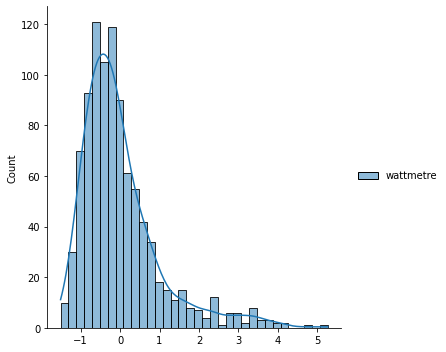

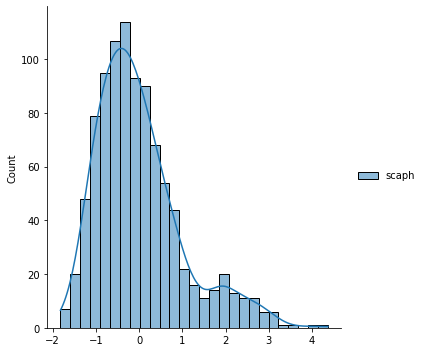

In [133]:
df = df.rename(columns={'value': 'scaph'})
df_norm = (df-df.mean())/df.std()
df2 = df2.rename(columns={'value': 'wattmetre'})
df2_norm = (df2-df2.mean())/df2.std()
print(df2_norm.describe())
print(df_norm.describe())
# print(df.describe())
# print(df2.describe())
# df3 = df.join(df2)
# df3.corr()
# df3
# df3 = pd.merge_ordered(df, df2)
# df3=  df3.dropna()
# df3 = df3 - df3.mean()
# df3.describe()
# # sb.scatterplot(data=df3, ci='sd')
sb.displot(data=df2_norm, kde=True)
sb.displot(data=df_norm, kde=True)